## Importing Necessary Libaries

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import time
import math
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [706]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\Housing.csv")

In [707]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [709]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [710]:
df.drop_duplicates(inplace=True)

In [711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Univariate Analysis

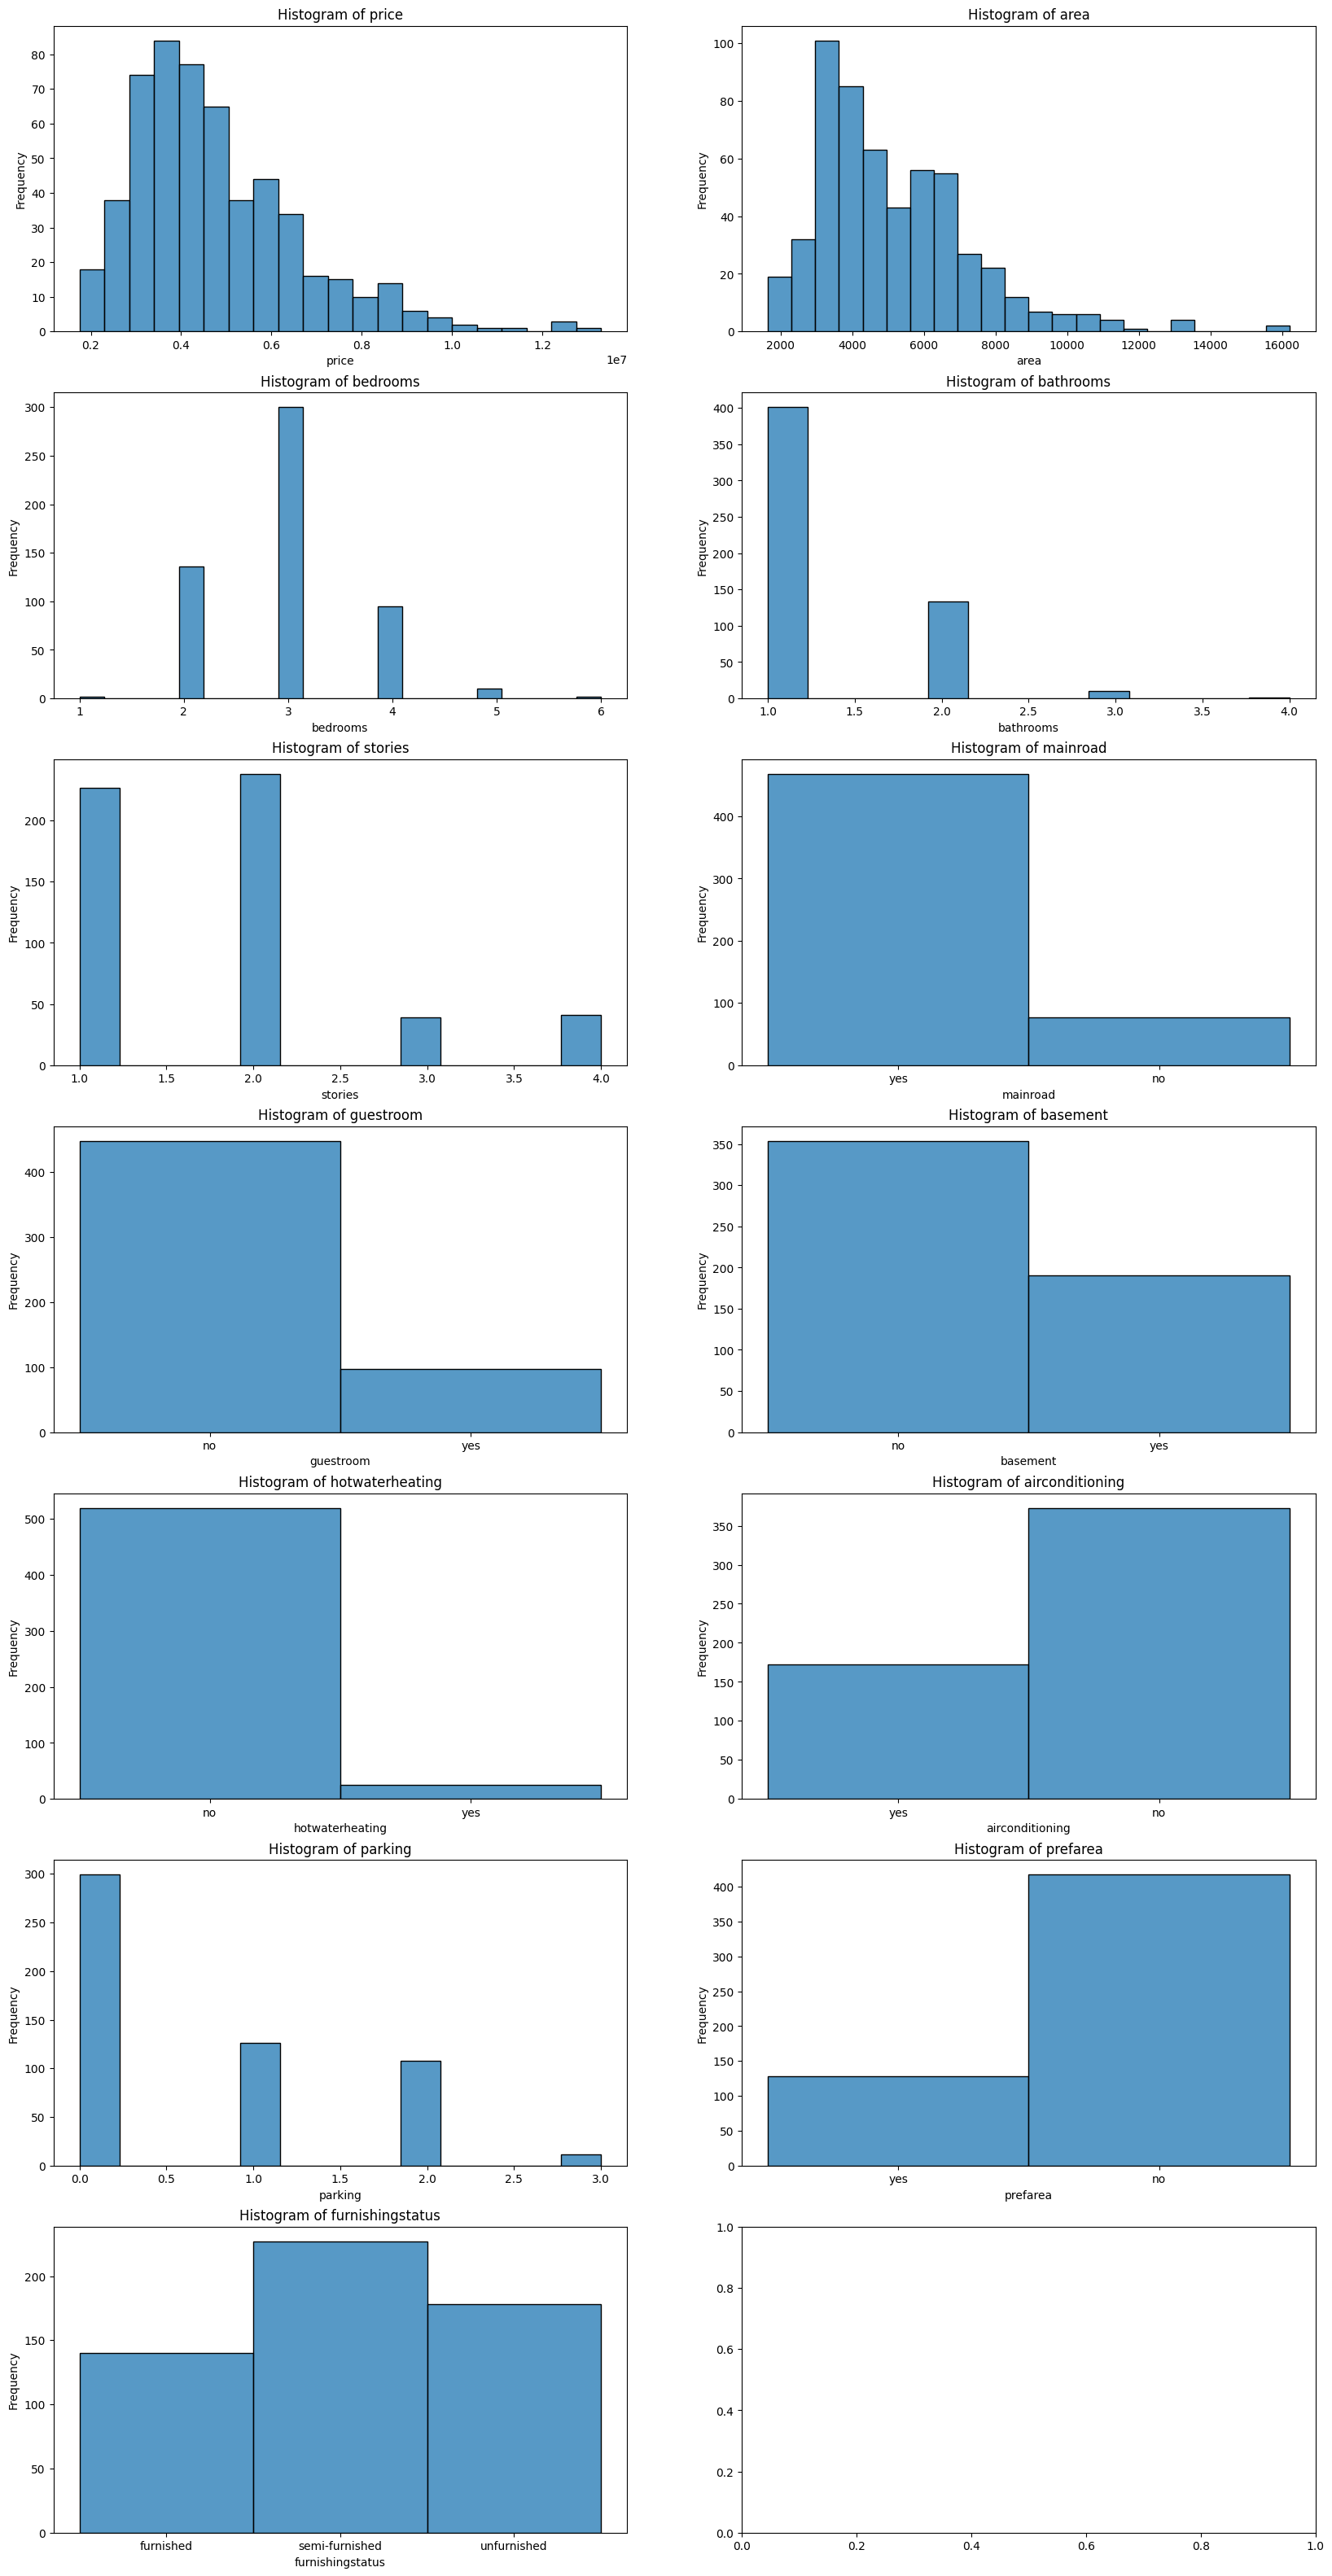

In [712]:
num_columns = len(df.columns)
num_rows = 2
    
fig, axes = plt.subplots(math.ceil(num_columns / num_rows), num_rows, figsize=(20, 40))
    
# Flatten the axes array for easy iteration if it's a 2D array
if math.ceil(num_columns / num_rows) > 1:
    axes = axes.flatten()
else:
    axes = [axes]
    
# Loop through the columns and create a histogram for each
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')


plt.show()

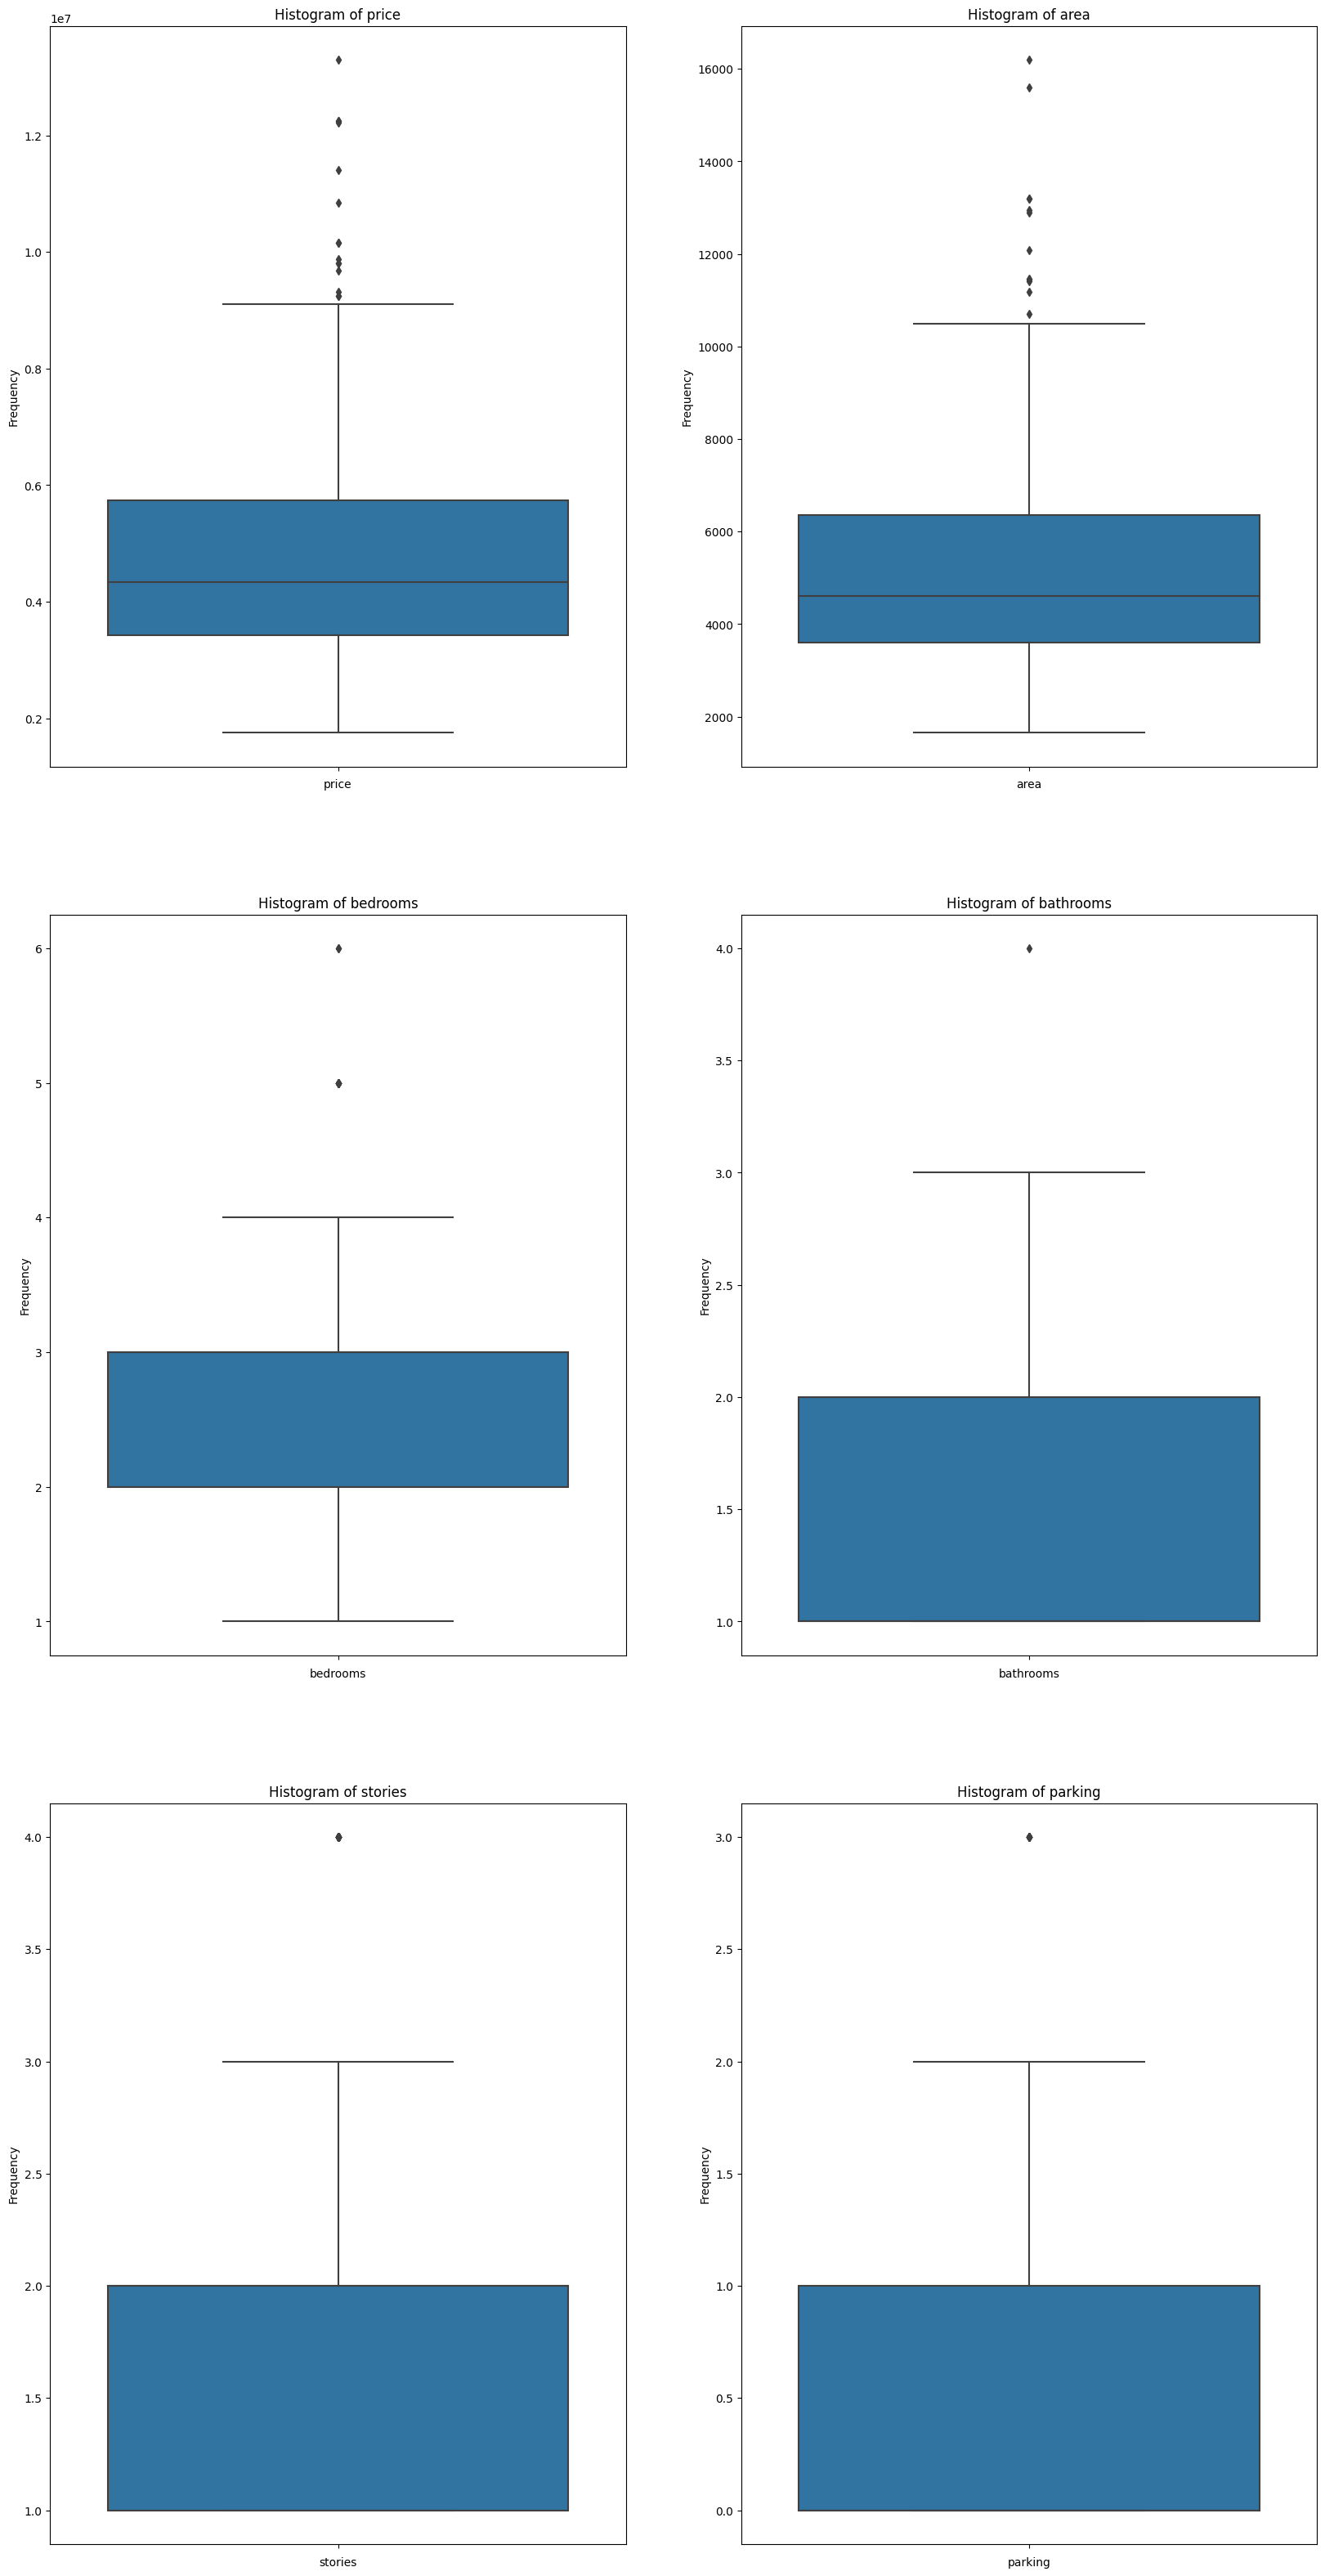

In [713]:
df_numeric = df.select_dtypes(include=['int64'])
num_columns = len(df_numeric.columns)
num_rows = 2
    
fig, axes = plt.subplots(math.ceil(num_columns / num_rows), num_rows, figsize=(20, 40))
    
# Flatten the axes array for easy iteration if it's a 2D array
if math.ceil(num_columns / num_rows) > 1:
    axes = axes.flatten()
else:
    axes = [axes]
    
# Loop through the columns and create a histogram for each
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    sns.boxplot(y=df_numeric[column], ax=axes[i])
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')


plt.show()

### Removing Outliers

In [714]:
df.drop(df[df['price'] >= 12000000].index, axis=0, inplace=True)
df.drop(df[df['area'] >= 14000].index, axis=0, inplace=True)

Note: Due to the small number of datapoints as well as the skewness in the target variable, it was determined reduction techniques such as the z-score or percentiles would not be performed.

## Determining Corelation / Bivariate Analysis

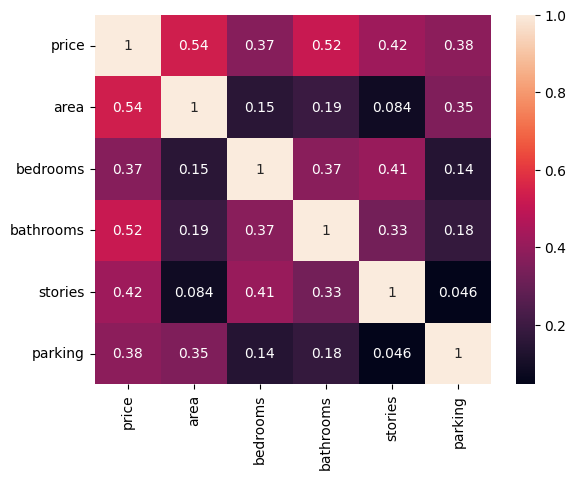

In [715]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

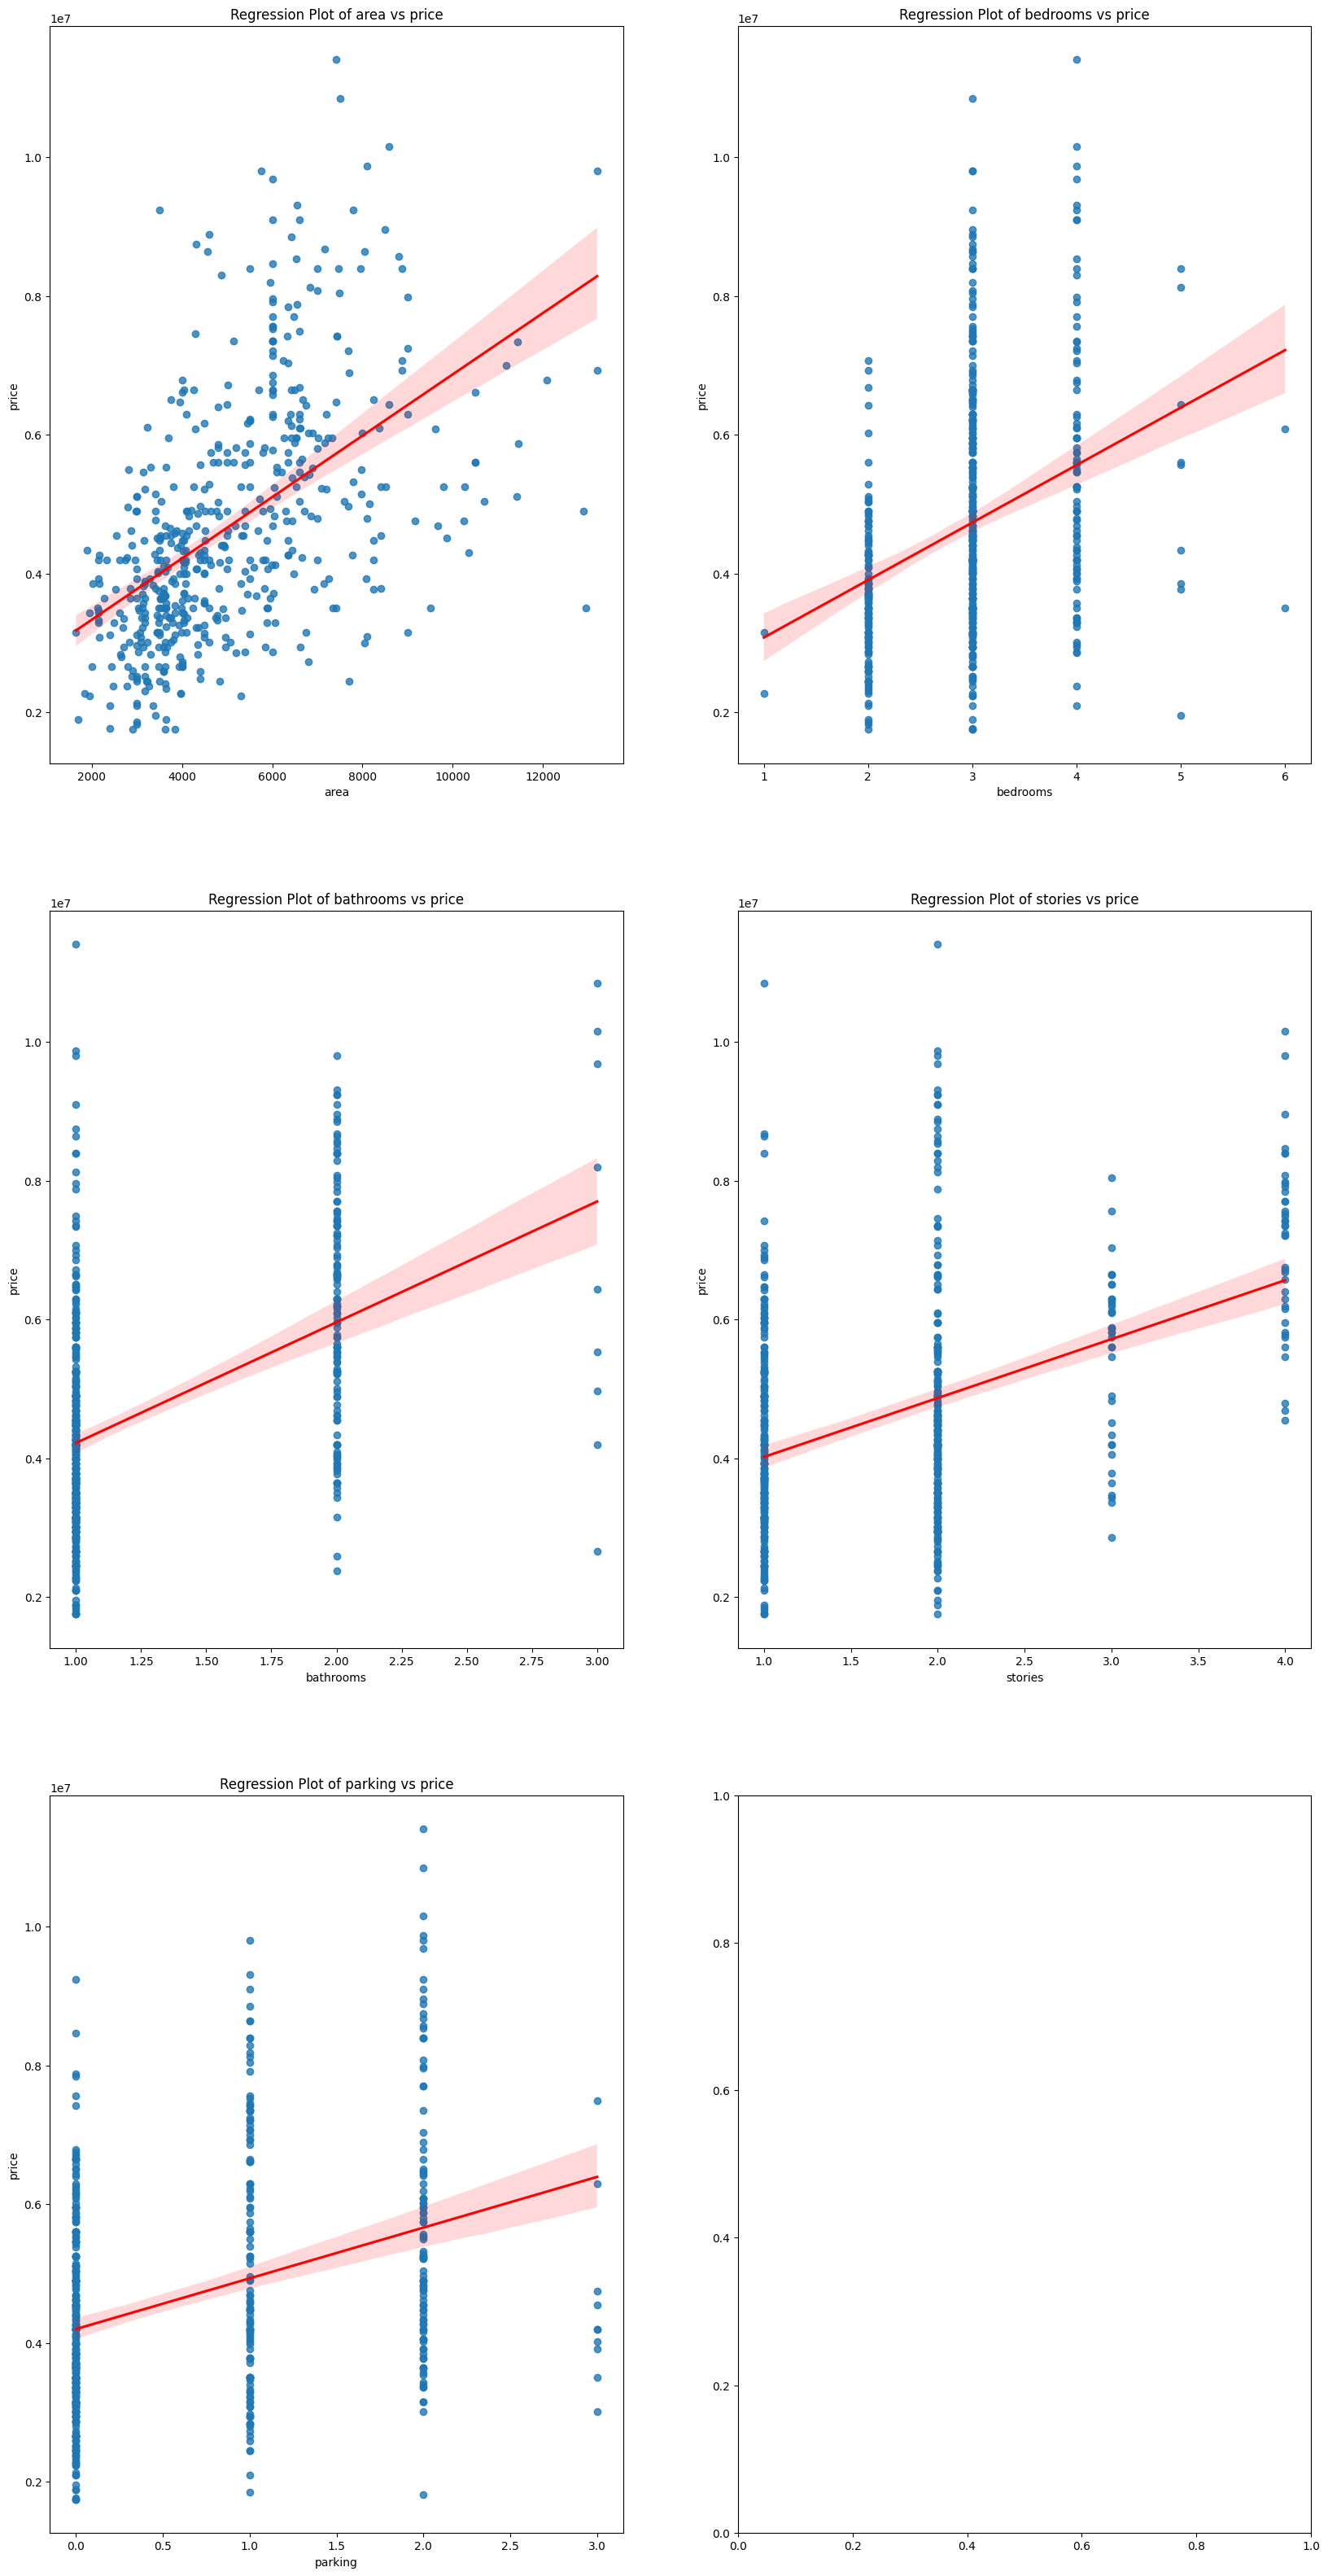

In [716]:
target_variable = 'price'

# Select only integer columns
df_numeric = df.select_dtypes(include=['int64']).drop(columns=[target_variable])
num_columns = len(df_numeric.columns)
num_rows = 2

fig, axes = plt.subplots(math.ceil(num_columns / num_rows), num_rows, figsize=(20, 40))

# Flatten the axes array for easy iteration if it's a 2D array
if math.ceil(num_columns / num_rows) > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Loop through the columns and create a regression plot for each
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    sns.regplot(x=df_numeric[column], y=df[target_variable], ax=ax, line_kws={"color": "red"})
    ax.set_title(f'Regression Plot of {column} vs {target_variable}')
    ax.set_xlabel(column)
    ax.set_ylabel(target_variable)

plt.show()

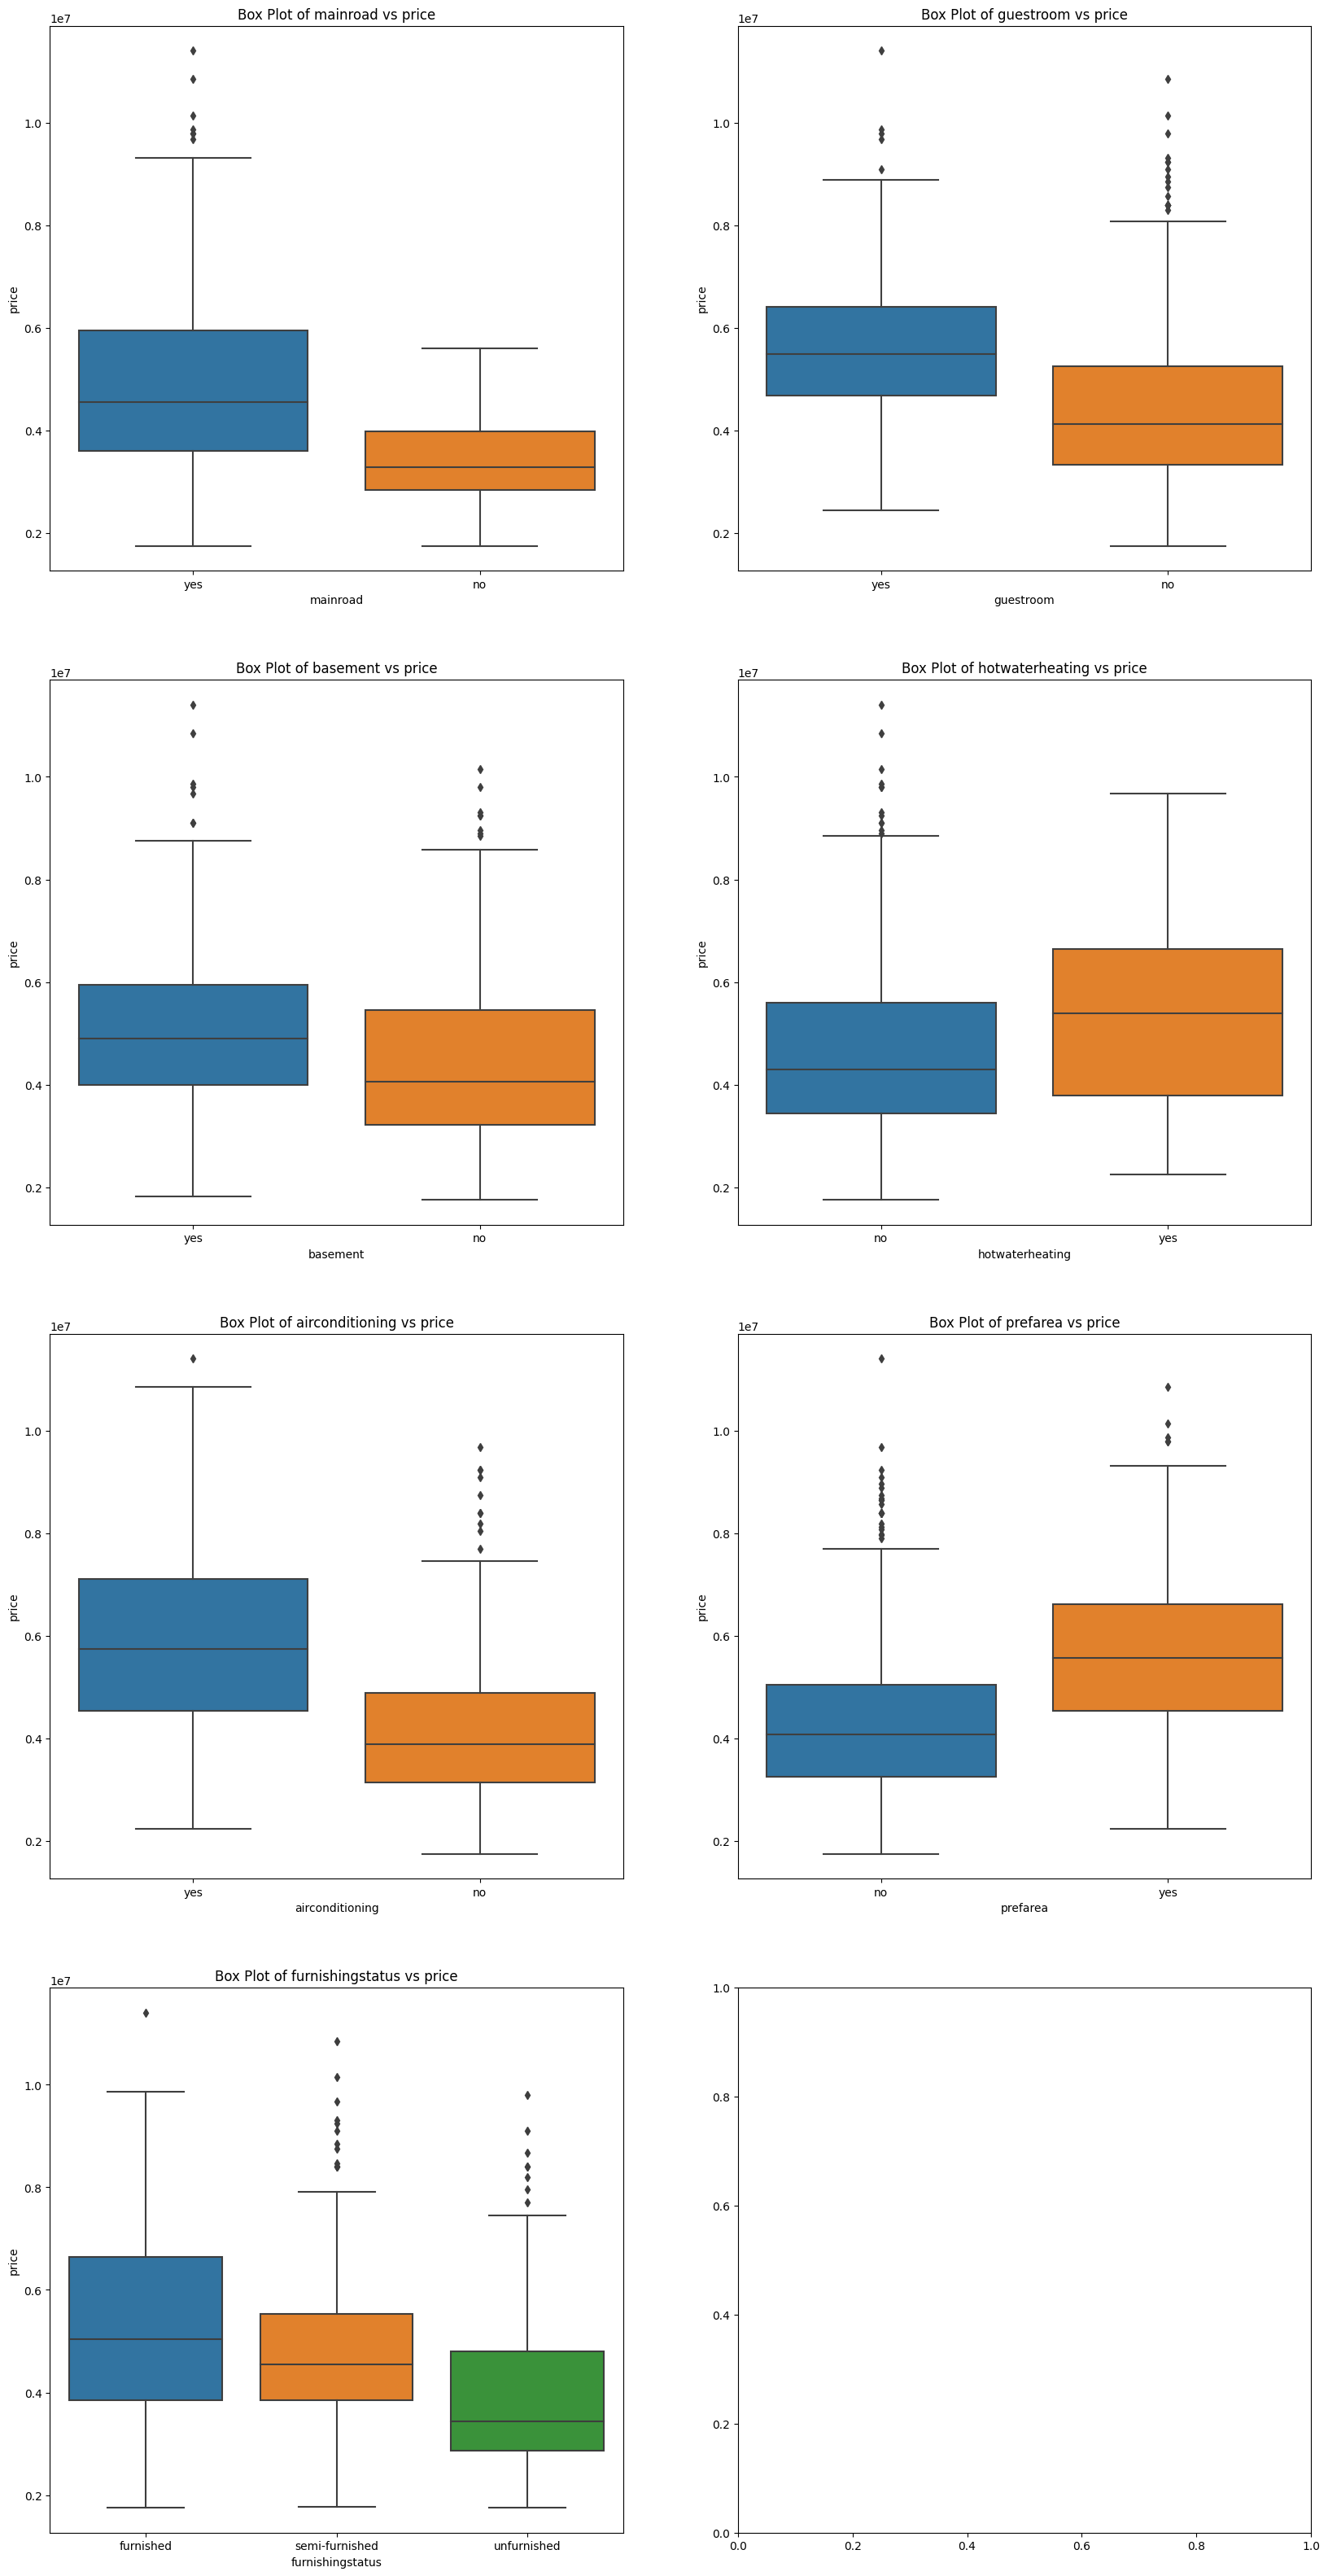

In [717]:
target_variable = 'price'
df_categorical = df.select_dtypes(exclude=['int64'])
num_columns = len(df_categorical.columns)
num_rows = 2

fig, axes = plt.subplots(math.ceil(num_columns / num_rows), num_rows, figsize=(20, 40))

# Flatten the axes array for easy iteration if it's a 2D array
if math.ceil(num_columns / num_rows) > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Loop through the columns and create a box plot for each
for i, column in enumerate(df_categorical.columns):
    ax = axes[i]
    sns.boxplot(x=df_categorical[column], y=df[target_variable], ax=ax)
    ax.set_title(f'Box Plot of {column} vs {target_variable}')
    ax.set_xlabel(column)
    ax.set_ylabel(target_variable)

plt.show()

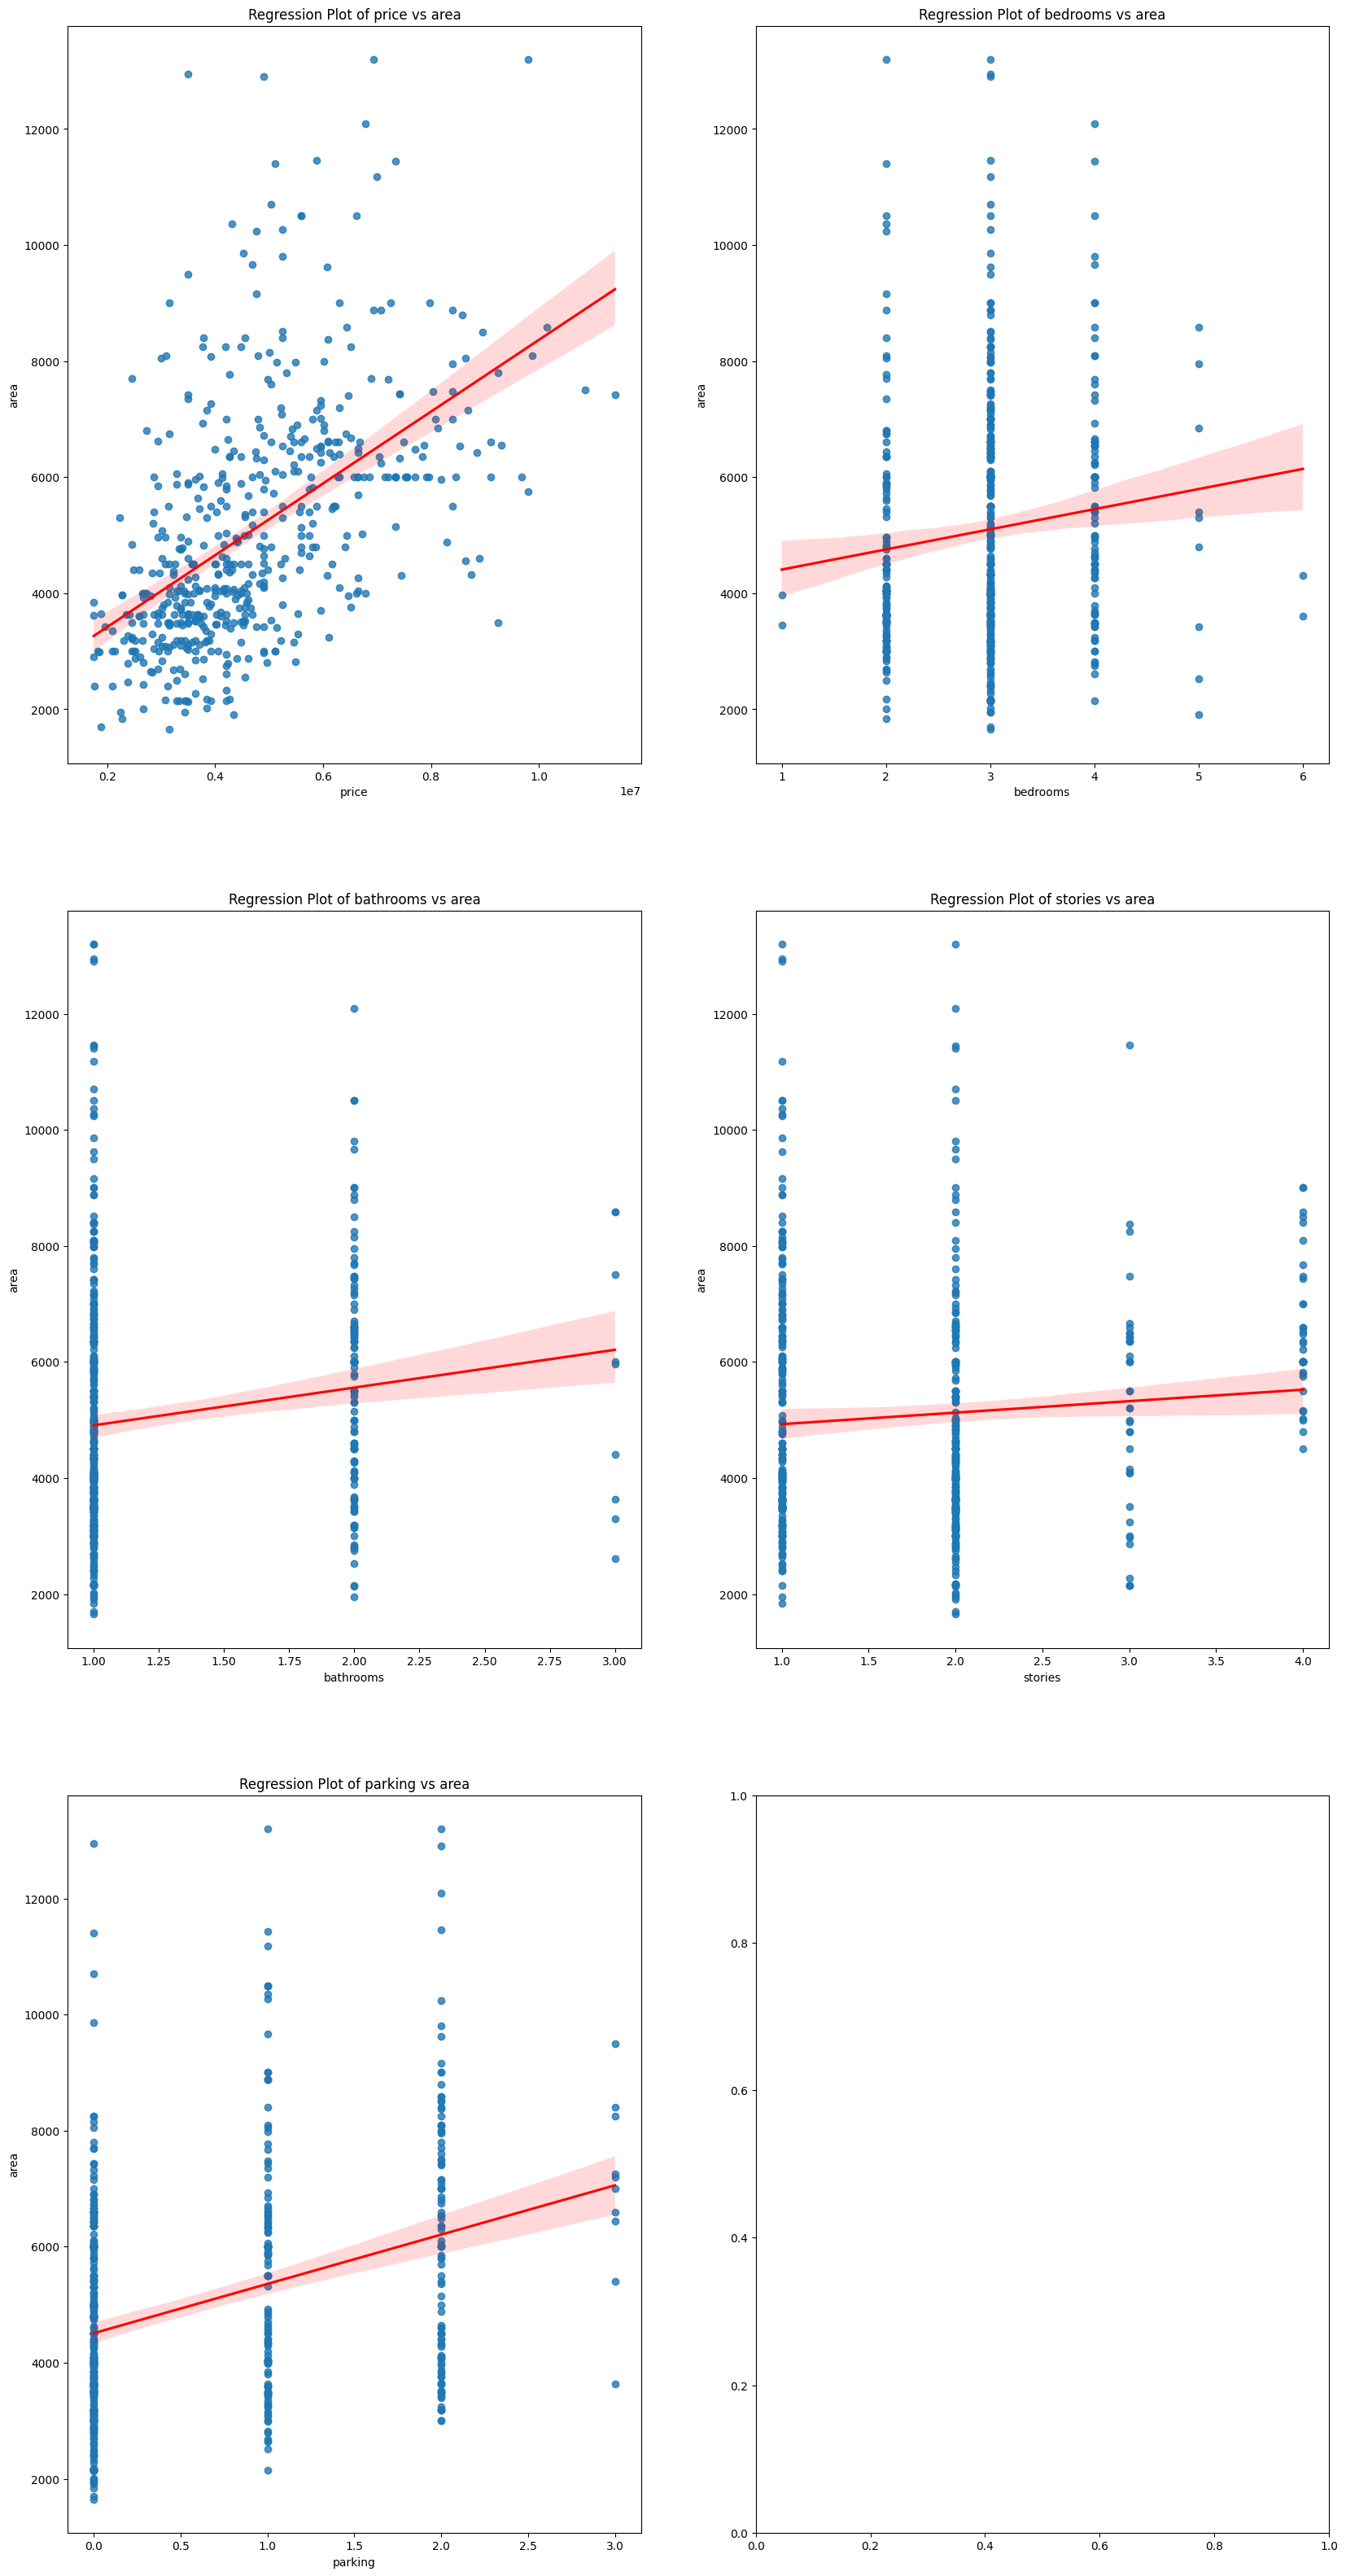

In [718]:
target_variable = 'area'

# Select only integer columns
df_numeric = df.select_dtypes(include=['int64']).drop(columns=[target_variable])
num_columns = len(df_numeric.columns)
num_rows = 2

fig, axes = plt.subplots(math.ceil(num_columns / num_rows), num_rows, figsize=(20, 40))

# Flatten the axes array for easy iteration if it's a 2D array
if math.ceil(num_columns / num_rows) > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Loop through the columns and create a regression plot for each
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    sns.regplot(x=df_numeric[column], y=df[target_variable], ax=ax, line_kws={"color": "red"})
    ax.set_title(f'Regression Plot of {column} vs {target_variable}')
    ax.set_xlabel(column)
    ax.set_ylabel(target_variable)

plt.show()

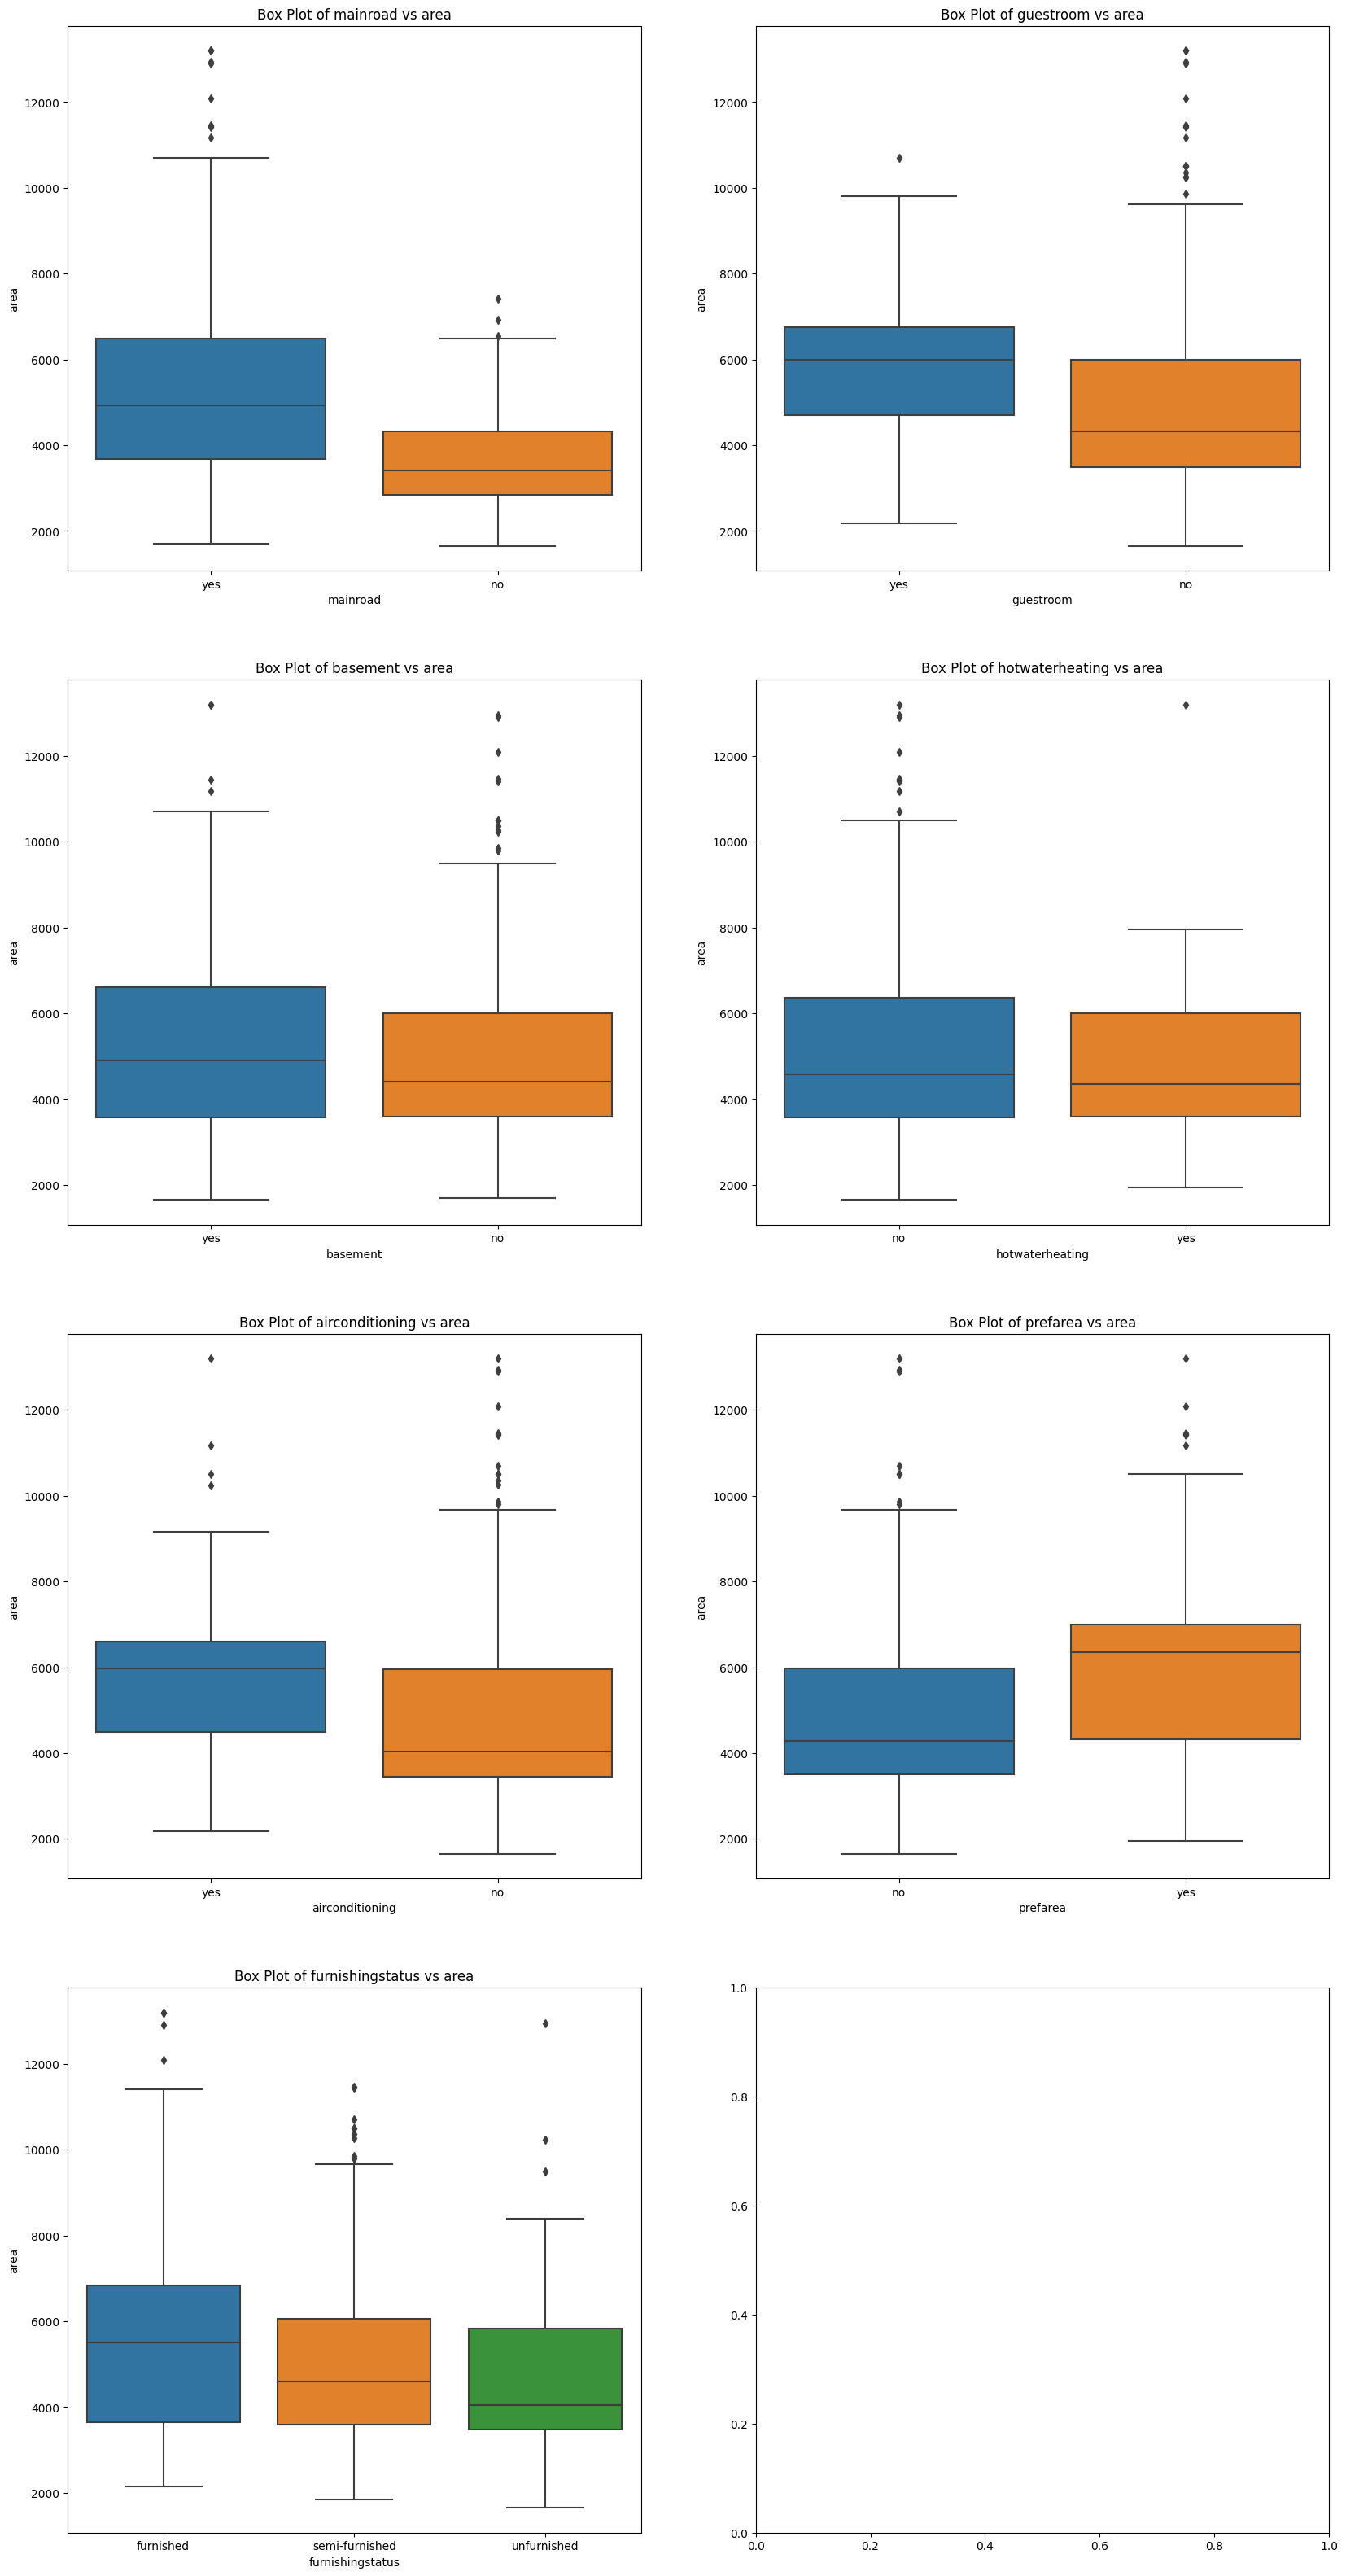

In [719]:
target_variable = 'area'
df_categorical = df.select_dtypes(exclude=['int64'])
num_columns = len(df_categorical.columns)
num_rows = 2

fig, axes = plt.subplots(math.ceil(num_columns / num_rows), num_rows, figsize=(20, 40))

# Flatten the axes array for easy iteration if it's a 2D array
if math.ceil(num_columns / num_rows) > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Loop through the columns and create a box plot for each
for i, column in enumerate(df_categorical.columns):
    ax = axes[i]
    sns.boxplot(x=df_categorical[column], y=df[target_variable], ax=ax)
    ax.set_title(f'Box Plot of {column} vs {target_variable}')
    ax.set_xlabel(column)
    ax.set_ylabel(target_variable)

plt.show()

In [720]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Creating OLS for Analysis of P-Values and Coefficients

In [721]:
#Lets determine an R-squared value based on the strong correlating graphs
results = ols("price ~ area + bedrooms + bathrooms + stories + mainroad + guestroom", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     113.4
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           7.76e-92
Time:                        17:02:34   Log-Likelihood:                -8287.6
No. Observations:                 539   AIC:                         1.659e+04
Df Residuals:                     532   BIC:                         1.662e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.029e+05   2.58e+05  

In [722]:
#Lets determine an R-squared value based on the strong correlating graphs
results = ols("price ~ basement + hotwaterheating + airconditioning + parking + prefarea + furnishingstatus", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     58.17
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.03e-61
Time:                        17:02:34   Log-Likelihood:                -8356.2
No. Observations:                 539   AIC:                         1.673e+04
Df Residuals:                     531   BIC:                         1.676e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [723]:
results = ols("price ~ area + bedrooms + bathrooms + stories + mainroad + guestroom + basement + hotwaterheating + airconditioning + parking + prefarea", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     95.31
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.23e-117
Time:                        17:02:34   Log-Likelihood:                -8214.5
No. Observations:                 539   AIC:                         1.645e+04
Df Residuals:                     527   BIC:                         1.650e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.11

## Trying to Determine Potential Multicollinearity

In [724]:
X = sm.add_constant(df[['area', 'bathrooms', 'stories', 'parking']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Feature        VIF
0      const  14.008842
1       area   1.155470
2  bathrooms   1.140649
3    stories   1.109138
4    parking   1.153931


In [725]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [726]:
categorical = ['mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'guestroom']

cramers_v_dict = {}

for i in range(len(categorical)):
    for j in range(i + 1, len(categorical)):
        column1 = categorical[i]
        column2 = categorical[j]
        v = cramers_v(df[column1], df[column2])
        cramers_v_dict[(column1, column2)] = v

# Print or inspect the results
for key, value in cramers_v_dict.items():
    print(f"Cramer's V for columns '{key[0]}' and '{key[1]}': {value}")

Cramer's V for columns 'mainroad' and 'basement': 0.0
Cramer's V for columns 'mainroad' and 'hotwaterheating': 0.0
Cramer's V for columns 'mainroad' and 'airconditioning': 0.08730492875107494
Cramer's V for columns 'mainroad' and 'prefarea': 0.18821611698474547
Cramer's V for columns 'mainroad' and 'guestroom': 0.07648582916532795
Cramer's V for columns 'basement' and 'hotwaterheating': 0.0
Cramer's V for columns 'basement' and 'airconditioning': 0.01855996653783222
Cramer's V for columns 'basement' and 'prefarea': 0.21393881417174823
Cramer's V for columns 'basement' and 'guestroom': 0.3671040122004058
Cramer's V for columns 'hotwaterheating' and 'airconditioning': 0.11191945511515818
Cramer's V for columns 'hotwaterheating' and 'prefarea': 0.021183276913940903
Cramer's V for columns 'hotwaterheating' and 'guestroom': 0.0
Cramer's V for columns 'airconditioning' and 'prefarea': 0.10076133807266385
Cramer's V for columns 'airconditioning' and 'guestroom': 0.13155601926577726
Cramer's V

Cramers_v is not typically used, but values were not high enough to show multicolinearity

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 4 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             539 non-null    int64 
 1   area              539 non-null    int64 
 2   bedrooms          539 non-null    int64 
 3   bathrooms         539 non-null    int64 
 4   stories           539 non-null    int64 
 5   mainroad          539 non-null    object
 6   guestroom         539 non-null    object
 7   basement          539 non-null    object
 8   hotwaterheating   539 non-null    object
 9   airconditioning   539 non-null    object
 10  parking           539 non-null    int64 
 11  prefarea          539 non-null    object
 12  furnishingstatus  539 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.0+ KB


## Creating Regression Models

In [728]:
categorical_features = ['mainroad','basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'guestroom']
numerical_features = ['area', 'bathrooms', 'stories', 'parking']
target = 'price'

In [729]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.2, random_state=1234)

In [730]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [731]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [732]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [733]:
start_time = time.time()

linear_regression.fit(X_train, y_train)

pred = linear_regression.predict(X_test)

mae = mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken to train the model: {elapsed_time:.2f} seconds")

Time taken to train the model: 0.02 seconds


In [734]:
print(f"The Mean Absolute Error is: {mean_absolute_error(y_test, pred):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")

The Mean Absolute Error is: 819702.11
The Root Mean Squared Error is: 1072958.81


In [735]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

In [736]:
start_time = time.time()

ridge_regression.fit(X_train, y_train)

pred_ridge = ridge_regression.predict(X_test)

mae = mean_absolute_error(y_test, pred_ridge)
np.sqrt(mean_squared_error(y_test, pred_ridge))

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken to train the model: {elapsed_time:.2f} seconds")

Time taken to train the model: 0.01 seconds


In [737]:
print(f"The Mean Absolute Error is: {mean_absolute_error(y_test, pred_ridge):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, pred_ridge)):.2f}")

The Mean Absolute Error is: 820059.80
The Root Mean Squared Error is: 1072360.42


In [738]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [739]:
start_time = time.time()

lasso_regression.fit(X_train, y_train)

lasso_pred = lasso_regression.predict(X_test)

mae = mean_absolute_error(y_test, lasso_pred)
np.sqrt(mean_squared_error(y_test, lasso_pred))

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken to train the model: {elapsed_time:.2f} seconds")

Time taken to train the model: 0.01 seconds


In [740]:
print(f"The Mean Absolute Error is: {mean_absolute_error(y_test, lasso_pred):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, lasso_pred)):.2f}")

The Mean Absolute Error is: 820183.38
The Root Mean Squared Error is: 1072413.69


In [741]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [742]:
start_time = time.time()

elasticnet_regression.fit(X_train, y_train)

elasticnet_pred = elasticnet_regression.predict(X_test)

mae = mean_absolute_error(y_test, elasticnet_pred)
np.sqrt(mean_squared_error(y_test, elasticnet_pred))

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken to train the model: {elapsed_time:.2f} seconds")

Time taken to train the model: 0.01 seconds


In [743]:
print(f"The Mean Absolute Error is: {mean_absolute_error(y_test, elasticnet_pred):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, elasticnet_pred)):.2f}")

The Mean Absolute Error is: 799290.91
The Root Mean Squared Error is: 1077088.14


Based on the metrics used, the best model for the scenario is the ridge regression (altough the values are relatively close). However, the values are still significantly off, meaning these models should not be used in general. Based on the OLS, the reason why ridge performed the best is that it handled the potential multicollinearity better than the other models.